In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
import pandas as pd

# Create Train Dataset

In [2]:
data_dir=r"C:\Users\speed\Documents\Face Mask Recognition TensorFlow Object Detection API\data\data"
classes=[i for i in os.listdir(data_dir)]
train=[]
for i in classes:
    current_class=classes.index(i)
    current_path=os.path.join(data_dir,i)
    for j in os.listdir(current_path):
        img=cv2.imread(os.path.join(data_dir,i,j),cv2.IMREAD_GRAYSCALE)
        try:
            img=cv2.resize(img,(70,70))
        except:
            continue
        train.append([img,current_class])
random.shuffle(train)
x=[]
y=[]
for i,j in train:
    x.append(i)
    y.append(j)
x=np.array(x)
y=np.array(y)

# Initialize TensorBoard

In [3]:
tsb=tf.keras.callbacks.TensorBoard(log_dir="logs")

# Create Model

In [20]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(70,70,1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Get Summary Of Model

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 68, 68, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 34, 34, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)        

# Compile The Model

In [22]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

# Train The Model

In [24]:
history=model.fit(x,y,epochs=20,validation_split=0.1,callbacks=[tsb])

Epoch 1/20
213/213 [==============================] - 38s 180ms/step - loss: 0.4238 - accuracy: 0.7990 - val_loss: 0.3766 - val_accuracy: 0.8386
Epoch 2/20
213/213 [==============================] - 42s 197ms/step - loss: 0.3574 - accuracy: 0.8474 - val_loss: 0.3307 - val_accuracy: 0.8585
Epoch 3/20
213/213 [==============================] - 44s 205ms/step - loss: 0.2945 - accuracy: 0.8766 - val_loss: 0.3457 - val_accuracy: 0.8479
Epoch 4/20
213/213 [==============================] - 42s 195ms/step - loss: 0.2568 - accuracy: 0.8945 - val_loss: 0.3128 - val_accuracy: 0.8585
Epoch 5/20
213/213 [==============================] - 43s 202ms/step - loss: 0.2303 - accuracy: 0.9073 - val_loss: 0.2745 - val_accuracy: 0.8823
Epoch 6/20
213/213 [==============================] - 43s 200ms/step - loss: 0.1875 - accuracy: 0.9216 - val_loss: 0.2894 - val_accuracy: 0.8770
Epoch 7/20
213/213 [==============================] - 43s 200ms/step - loss: 0.1562 - accuracy: 0.9384 - val_loss: 0.2853 - val_ac

# Accuracy Graph

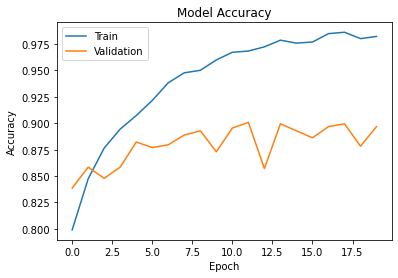

In [25]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Loss Graph

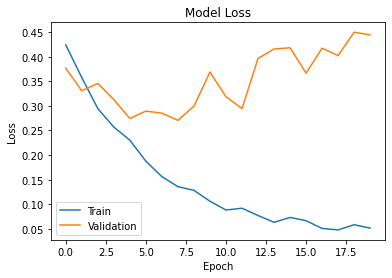

In [26]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Predict On Images

In [27]:
def prepare(filepath):
    img=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(70,70))
    return img.reshape(-1,70,70,1)

## Without Mask

1/1 [==============================] - 0s 17ms/step
without_mask


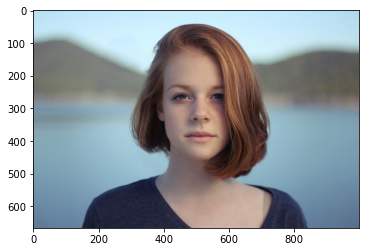

In [75]:
print(classes[int(np.round(model.predict(prepare(r"C:\Users\speed\Downloads\images.jpg"))))])
plt.imshow(plt.imread(r"C:\Users\speed\Downloads\images.jpg"))

## With Mask

1/1 [==============================] - 0s 17ms/step
with_mask


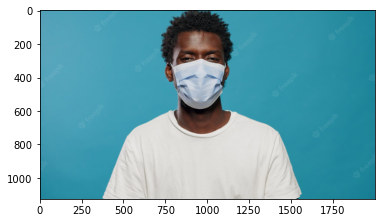

In [76]:
print(classes[int(np.round(model.predict(prepare(r"C:\Users\speed\Downloads\images2.jpg"))))])
plt.imshow(plt.imread(r"C:\Users\speed\Downloads\images2.jpg"))

# Save The Model

In [73]:
model.save("face_mask_detection.h5")

# Convert Model To TFLite Model For Edge Devices

In [74]:
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
with open("face_mask_detection.tflite","wb")as f:
    f.write(tf_lite_converter.convert())

INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmpflnjpa72\assets


INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmpflnjpa72\assets
